# Plots for our Paper

## Preamble

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../')
import fluctuations
import twenty_one
import physics as phys

import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interp1d

import dill


Bad key text.latex.preview in file matplotlibrc, line 14 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
import matplotlib.pylab as pylab
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Load Baryon Temperature Data

In [4]:
# Tb_data_folder = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia_old_reversed_z/'
Tb_data_folder = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/'

mm_string_list = ['10_MeV', '30_MeV', '100_MeV', '300_MeV', '1_GeV', '3_GeV', '10_GeV', '30_GeV', '100_GeV', '300_GeV']

Vlis = np.loadtxt(open(Tb_data_folder+'Vlis.csv'), delimiter=',')
Qlis = np.loadtxt(open(Tb_data_folder+'Qlis.csv'), delimiter=',')
zlis = np.loadtxt(open(Tb_data_folder+'zlis.csv'), delimiter=',')

# in GeV
mmlis = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30., 100., 300.])

# dimensions mmlis x zlis x Qlis x Vlis
data_Tb = np.array([[np.loadtxt(Tb_data_folder+'mc100MeV_mm'+mm_string+'_z_'+str(int(z))+'.csv', delimiter=',') for z in zlis] for mm_string in mm_string_list])


# change to Vlis x zlis x Qlis x mmlis
data_Tb = np.transpose(data_Tb, axes=(3, 1, 2, 0)) / phys.kB

# data_Tb = np.flip(data_Tb, axis=1)

In [5]:
raw = np.array([[np.loadtxt(Tb_data_folder+'mc100MeV_mm'+mm_string+'_z_'+str(int(z))+'.csv', delimiter=',') for z in zlis] for mm_string in mm_string_list])

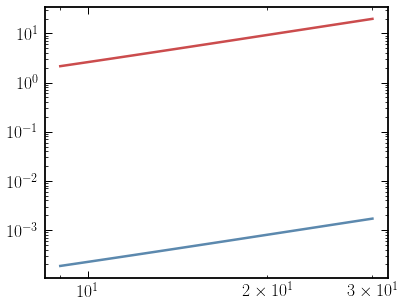

In [6]:
plt.figure()

plt.loglog()

plt.plot(zlis, data_Tb[-1, :, -1, -1])
plt.plot(zlis, raw[-1, :, -1, -1])

In [7]:
raw_9 = np.loadtxt(Tb_data_folder+'mc100MeV_mm10_MeV_z_'+str(9)+'.csv', delimiter=',')
raw_30 = np.loadtxt(Tb_data_folder+'mc100MeV_mm10_MeV_z_'+str(30)+'.csv', delimiter=',')

print(raw_9[-1, -1], raw_30[-1, -1])

0.0002518893037381059 0.001845735415659472


## Load Power Spectra Data

In [8]:
# T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/old_before_discovering_z_flipped/mc100MeV_full_smooth_deg3_fid_xA_fid_dTK.p', 'rb'))
T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/mc100MeV_full_smooth_deg3_fid_xA_fid_dTK.p', 'rb'))

k_ary, delta2_ary = T21_fluc.power_spec 

# k_ary x z_ary x Q_ary x mm_ary
print(delta2_ary.shape)

(4096, 22, 90, 10)


## Load Experimental Data

In [9]:
expt_data_dir = '/home/hongwanl/21cmBounds/data/'


# [z, k, Delta^2 in mK^2]
MWA_2016_high_z = np.array([[12.2, 0.18*phys.h, 2.5e7], [15.35, 0.21*phys.h, 8.3e7], [17.05, 0.22*phys.h, 2.7e8]])

AARTFAAC_high_z = np.array([[(17.9 + 18.6) / 2., 0.144*phys.h, 7388.**2]])

## Power Spectrum at Fixed Redshift

Redshift:  20.0
Q:  0.0017216903932435344
m_m in GeV:  0.3
k in Mpc^-1:  0.10028091636980907


(1000.0, 1000000000.0)

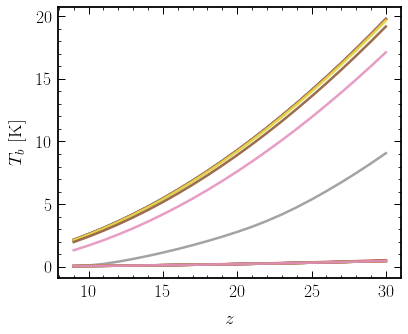

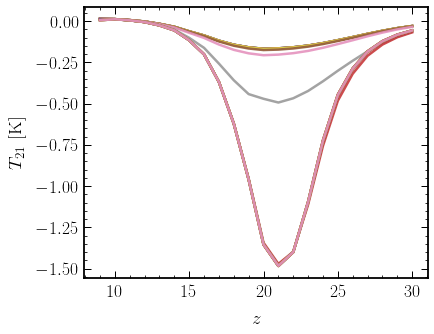

<Figure size 443.077x360 with 0 Axes>

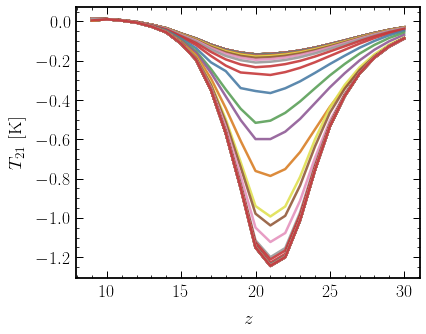

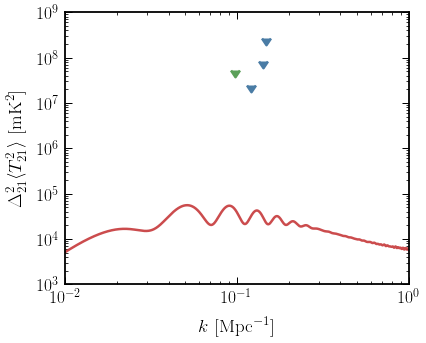

In [61]:
z_ind = 11
Q_ind = 48
mm_ind = 3
# z_ind = 3
# Q_ind = 50
# mm_ind = 2
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

# plt.figure()

# plt.yscale('log')

# plt.plot(Vlis*29, data_Tb[:, 6:12, -1, mm_ind])

# plt.xlabel(r'$v_\mathrm{bc}$ [km s$^{-1}$]')
# plt.ylabel(r'$T_b$ [K]')

plt.figure()

# plt.plot(zlis, np.transpose(data_Tb[::25, :, -1, mm_ind]))

plt.plot(zlis, data_Tb[0, :, ::5, mm_ind])

plt.xlabel(r'$z$')
plt.ylabel(r'$T_b$ [K]')


# plt.figure()

# print(zlis[6:12])

# plt.plot(T21_fluc.v_ary, T21_fluc.f_ary[:, 6:12, -1, mm_ind])

# plt.xlabel(r'$v_\mathrm{bc}$ [km s$^{-1}$]')
# plt.ylabel(r'$T_{21}$ [mK]')

plt.figure()

global_signal_v = T21_fluc.f_ary[0, :, ::5, mm_ind]

plt.plot(T21_fluc.data_dict['z'], global_signal_v)

plt.xlabel(r'$z$')
plt.ylabel(r'$T_{21}$ [K]')

plt.figure()

plt.figure()

global_signal = T21_fluc.v_fluc.mean_f(T21_fluc.f_in_v, T21_fluc.v_ary)

plt.plot(T21_fluc.data_dict['z'], global_signal[:, :, mm_ind])

plt.xlabel(r'$z$')
plt.ylabel(r'$T_{21}$ [K]')

plt.figure()

plt.loglog()

plt.plot(k_ary, delta2_ary[:, z_ind, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$\Delta_{21}^2 \langle T_{21}^2 \rangle$ [mK$^2$]')

plt.xlim(1e-2, 1.)
plt.ylim(1e3, 1e9)

In [11]:
test_indices = np.moveaxis(np.indices(delta2_ary[k_ind, :, :, :].shape), 0, -1)

max_ind = np.argmax(delta2_ary[k_ind]*1e6)

print(test_indices.reshape(-1, test_indices.shape[-1])[max_ind])

print(delta2_ary[k_ind, 11, 48, 4])

[12 39  2]
0.0769332558349303


Redshift:  20.0
Q:  0.0017216903932435344
m_m in GeV:  1.0
k in Mpc^-1:  0.10028091636980907


(0.01, 1)

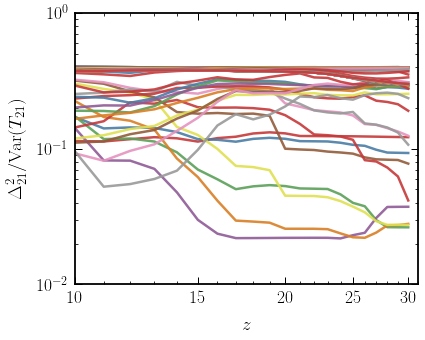

In [52]:
from matplotlib.ticker import(MultipleLocator, FormatStrFormatter, NullFormatter)

plt.figure()

z_ind = 11
Q_ind = 48
mm_ind = 4
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

plt.loglog()

plt.plot(T21_fluc.data_dict['z'], delta2_ary[k_ind, :, :, mm_ind] / T21_fluc.var[:, :, mm_ind])
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
# plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
# plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta_{21}^2 / \mathrm{Var}(T_{21})$')

ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%2.0d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_formatter(NullFormatter())

# plt.yticks([1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6])

plt.xlim(10., 31.)
plt.ylim(1e-2, 1)



Redshift:  20.0
Q:  0.0017216903932435344
m_m in GeV:  1.0
k in Mpc^-1:  0.10028091636980907


(0.01, 1.0)

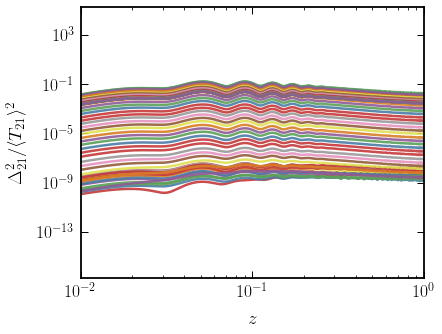

In [56]:
from matplotlib.ticker import(MultipleLocator, FormatStrFormatter, NullFormatter)

plt.figure()

z_ind = 11
Q_ind = 48
mm_ind = 4
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

plt.loglog()

plt.plot(k_ary, delta2_ary[:, z_ind, 6:, mm_ind] / global_signal[z_ind, 6:, mm_ind]**2)
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
# plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
# plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta_{21}^2 / \langle T_{21} \rangle^2$')

ax = plt.gca()

# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%2.0d'))
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_minor_formatter(NullFormatter())

# plt.yticks([1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6])

plt.xlim(1e-2, 1.)
# plt.ylim(1e-3, 1)



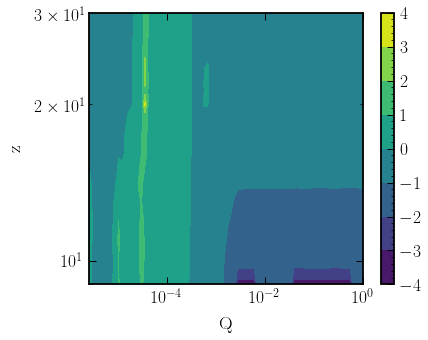

In [79]:
T21_rms_over_mean_T_minus_TCDM = np.sqrt(T21_fluc.var[:, 6:, mm_ind]) / np.abs(global_signal[:, 6:, mm_ind] - global_signal[:, 0, mm_ind, None])

plt.loglog()

plt.contourf(T21_fluc.data_dict['Q'][6:], T21_fluc.data_dict['z'], np.log10(T21_rms_over_mean_T_minus_TCDM))

plt.xlabel('Q')
plt.ylabel('z')

plt.colorbar()

In [78]:
T21_rms_over_mean_T_minus_TCDM[0]

array([2.59255827e+00, 9.17081248e-01, 7.56688277e-01, 7.53717492e-01,
       6.55451911e-01, 5.97072095e-01, 7.16726793e-01, 8.15920783e-01,
       1.61607764e+00, 1.29326308e+01, 3.08321506e+00, 2.36488453e+00,
       2.20066767e+00, 2.39977959e+00, 2.95234008e+00, 4.61231357e+00,
       1.67368120e+01, 3.89154757e+00, 2.86253935e+00, 2.92120317e+00,
       2.99688146e+00, 2.71924312e+00, 2.14974183e+00, 1.89313639e+00,
       1.70298289e+00, 1.54984882e+00, 1.47067081e+00, 1.34520258e+00,
       1.20532155e+00, 1.13512703e+00, 1.02979774e+00, 9.17686840e-01,
       8.58972111e-01, 7.46769175e-01, 5.87500687e-01, 4.89257896e-01,
       4.10963371e-01, 3.10387820e-01, 2.24371314e-01, 1.75288198e-01,
       1.28767922e-01, 8.01085226e-02, 5.75587758e-02, 4.93140781e-02,
       4.01459766e-02, 3.92927947e-04, 3.91937582e-04, 3.90784554e-04,
       3.90686961e-04, 3.91476428e-04, 3.92408544e-04, 3.59714615e-02,
       3.59913984e-02, 3.60149323e-02, 3.60022629e-02, 3.59657104e-02,
      

z:  20.0
z:  20.0
z:  20.0


(0.1, 1.0)

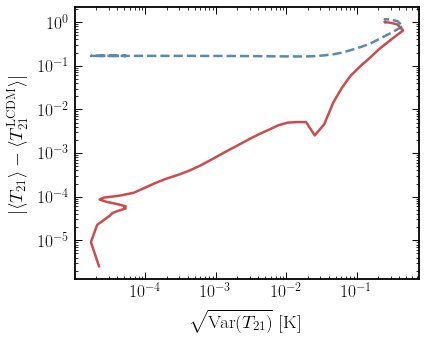

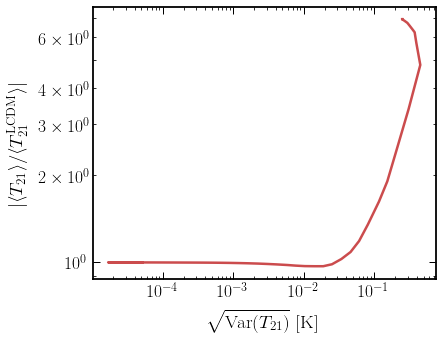

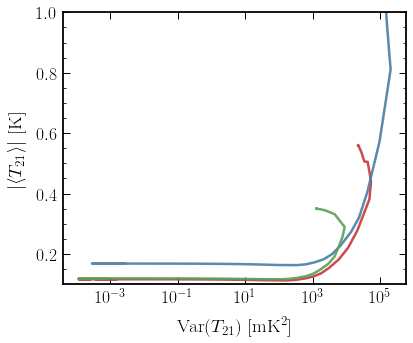

In [112]:
plt.figure()

plt.loglog()

print('z: ', T21_fluc.data_dict['z'][11])

# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_rms_over_mean_T_minus_TCDM[11, :])
plt.plot(np.sqrt(T21_fluc.var[11, 6:, mm_ind]), np.abs(global_signal[11, 6:, mm_ind] - global_signal[11, 0, mm_ind, None]))
plt.plot(np.sqrt(T21_fluc.var[11, 6:, mm_ind]), np.abs(global_signal[11, 6:, mm_ind]), '--')

plt.xlabel(r'$\sqrt{\mathrm{Var}(T_{21})}$ [K]')
plt.ylabel(r'$|\langle T_{21} \rangle - \langle T_{21}^\mathrm{LCDM} \rangle |$')


plt.figure()

plt.loglog()

print('z: ', T21_fluc.data_dict['z'][11])

# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_rms_over_mean_T_minus_TCDM[11, :])
plt.plot(np.sqrt(T21_fluc.var[11, 6:, mm_ind]), np.abs(global_signal[11, 6:, mm_ind] / global_signal[11, 0, mm_ind, None]))
# plt.plot(T21_fluc.var[11, 6:, mm_ind],T21_fluc.var[11, 6:, mm_ind],':')


plt.xlabel(r'$\sqrt{\mathrm{Var}(T_{21})}$ [K]')
plt.ylabel(r'$|\langle T_{21} \rangle / \langle T_{21}^\mathrm{LCDM} \rangle |$')


plt.figure()

plt.xscale('log')

print('z: ', T21_fluc.data_dict['z'][11])

# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_rms_over_mean_T_minus_TCDM[11, :])
plt.plot(T21_fluc.var[16, 6:, mm_ind]*1e6, np.abs(global_signal[16, 6:, mm_ind]))
plt.plot(T21_fluc.var[11, 6:, mm_ind]*1e6, np.abs(global_signal[11, 6:, mm_ind]))
plt.plot(T21_fluc.var[8, 6:, mm_ind]*1e6, np.abs(global_signal[8, 6:, mm_ind]))
# plt.plot(T21_fluc.var[11, 6:, mm_ind]*1e6, np.abs(global_signal[11, 0, mm_ind]) * np.ones_like(T21_fluc.var[11, 6:, mm_ind]), '--')
# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_fluc.var[11, 6:, mm_ind], ':')
# plt.plot(T21_fluc.var[11, 6:, mm_ind],T21_fluc.var[11, 6:, mm_ind],':')


plt.xlabel(r'$\mathrm{Var}(T_{21})$ [mK$^2$]')
plt.ylabel(r'$|\langle T_{21} \rangle|$ [K]')

plt.ylim(0.1, 1)


Redshift:  20.0
Q:  0.00010531055707361888
m_m in GeV:  1.0
k in Mpc^-1:  0.10028091636980907


(1e-08, 1000000.0)

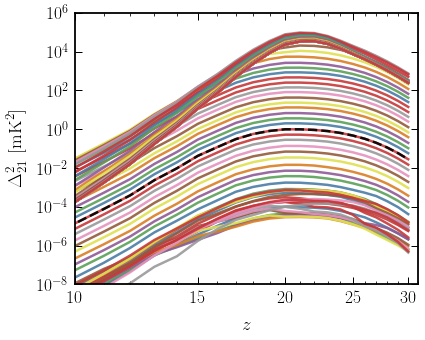

In [83]:
from matplotlib.ticker import(MultipleLocator, FormatStrFormatter, NullFormatter)

plt.figure()

z_ind = 11
Q_ind = 30
mm_ind = 4
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

plt.loglog()

plt.plot(T21_fluc.data_dict['z'], delta2_ary[k_ind, :, :, mm_ind]*1e6)
plt.plot(T21_fluc.data_dict['z'], delta2_ary[k_ind, :, Q_ind, mm_ind]*1e6, 'k--')
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
# plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
# plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta_{21}^2$ [mK$^2$]')

ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%2.0d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_formatter(NullFormatter())

plt.yticks([1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6])

plt.xlim(10., 31.)
plt.ylim(1e-8, 1e6)



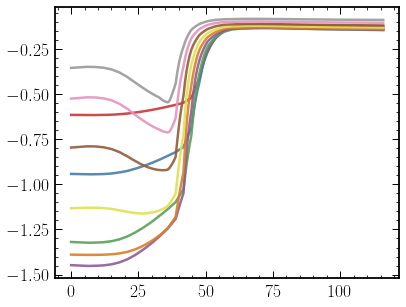

In [15]:
plt.figure()

plt.plot(T21_fluc.v_ary, T21_fluc.f_ary[:, 9:18, -1, mm_ind])

In [16]:
import pickle

data_raw = pickle.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/data_Vrel_m_m_100_MeV_m_C_100_MeV.p', 'rb'))